In [1]:
import pandas as pd
import numpy as np
import sklearn
import json
import matplotlib.pyplot as plot
%matplotlib inline

## Read in the user metadata file

In [4]:
# user_metadata_file = 'test.json'
# with open(user_metadata_file) as f:
#     users = json.load(f)
#     user_info= pd.DataFrame(users)

# print(len(user_info))

user_metadata_file = 'user_metadata_latest.jsonl'
user_metadata_list = []
with open(user_metadata_file) as fp:
    for line in fp.readlines():
        user_metadata_list.append(json.loads(line))

user_info = pd.DataFrame(user_metadata_list)

Add columns for follows_sg, follows_professional_sg, and follows_thinspo

In [5]:
user_info['follows_sg'] = None
user_info['follows_professional_sg'] = None
user_info['follows_thinspo'] = None
user_info['is_anorexia_recovery'] = None

In [6]:
user_info.head()

,created_at,description,favourites_count,followers_count,friends_count,id,lang,listed_count,location,name,profile_location,screen_name,statuses_count,time_zone,utc_offset,verified,follows_sg,follows_professional_sg,follows_thinspo,is_anorexia_recovery
0,2013-01-04 14:14:01,recovering from anorexia. inpatient X1 .life i...,63,1842,536,1060558130,en,18,Wonderland,Recovery Vs Relspse,None,BrokenPurge,18326,None,None,False,None,None,None,None
1,2018-07-13 18:37:04,Tweeting all things MH & positive thoughts whi...,41,50,213,1017840348083650560,en,0,,flyingfree,None,flyingf28327022,159,None,None,False,None,None,None,None
2,2017-07-17 17:41:33,Jumping on the bandwagon of 'tweet what you ea...,31,32,185,887004356075286528,en,1,"South West, England",Emily May,None,queenofoats,22,None,None,False,None,None,None,None
3,2016-06-06 11:15:49,New TV series seeks 16-19yr olds suffering fro...,9,77,256,739777811964153856,en-gb,0,"London, England",NewEDProg,None,NewEDProg,221,None,None,False,None,None,None,None
4,2010-02-01 18:36:29,A recovering anorexic simultaneously trying to...,0,4397,5661,110487555,en,108,London,msjoanna cake,None,msjoannacake,3245,None,None,False,None,None,None,None


## Gather information about the number of support groups

In [7]:
support_groups = pd.read_csv('supportgroup.csv', header=1)
support_groups.head()

,screen_name,is_thinspo,is_anorexia_recovery,professional_sg,sg,follows_thinspo,Notes
0,cheers_forana,TRUE,False,NaN,NaN,TRUE,NaN
1,lifeoverAna,FALSE,True,"Silencing_ED,EatingRecovery,loveyourbody,EDCar...","angelaegambrel,ichosetolive,HopefulRecovery,An...",FALSE,NaN
2,BrokenPurge,FALSE,True,"AnorexiaDaily,Spreading_L0ve,SelfHarmWIILEnd,A...","scalesR4fish,StandStr0ng,DyingDaisy_,AwareOfSe...",TRUE,NaN
3,xbertyx,FALSE,True,"ProjectBuddy,AgainstSuicide",EndThePain_,TRUE,Fitness enthu
4,flyingf28327022,NaN,NaN,NaN,NaN,NaN,Private user


In [8]:
professional_sg_set = set()
sg_set = set()

THRESHOLD = 2

for i in range(len(support_groups)):
    screen_name = support_groups.loc[i, 'screen_name']
    
    # can be empty
    idx = user_info.index[user_info['screen_name'] == screen_name]
    
    # get professional support groups
    professional_sg = support_groups.loc[i, 'professional_sg']
    if not pd.isnull(professional_sg) and professional_sg is not '-':
        sgs = list(map(lambda x: x.lower(), professional_sg.split(',')))
        # Classify user as following professional SG if they follow >= THRESHOLD professional SG's
        if not idx.empty:
            user_info.at[idx, 'follows_professional_sg'] = len(sgs) >= THRESHOLD
        professional_sg_set.update(sgs)
    
    # get non-professional support groups
    sg = support_groups.loc[i, 'sg']
    if not pd.isnull(sg) and sg is not '-':
        sgs = list(map(lambda x: x.lower(), sg.split(',')))
        # Classify user as following SG if they follow >= THRESHOLD SG's
        if not idx.empty:
            user_info.at[idx, 'follows_sg'] = len(sgs) >= THRESHOLD
        sg_set.update(sgs)
        
    is_anorexia_recovery = support_groups.loc[i, 'is_anorexia_recovery']
    if not pd.isnull(sg) and sg is not '-':
        if not idx.empty:
            user_info.at[idx, 'is_anorexia_recovery'] = is_anorexia_recovery == True
    
    follows_thinspo = support_groups.loc[i, 'follows_thinspo']
    if not pd.isnull(sg) and sg is not '-':
        if not idx.empty:
            user_info.at[idx, 'follows_thinspo'] = follows_thinspo == 'TRUE'
        sg_set.update(sgs)

print("# professional support groups: {}".format(len(professional_sg_set)))
print("# non-professional support_groups: {}".format(len(sg_set)))

# professional support groups: 102
# non-professional support_groups: 106


Classify the users in the users_info data frame as following professional support groups, non-professional support groups, or neither

In [9]:
# Verify that the new columns are populated
user_info.head()

,created_at,description,favourites_count,followers_count,friends_count,id,lang,listed_count,location,name,profile_location,screen_name,statuses_count,time_zone,utc_offset,verified,follows_sg,follows_professional_sg,follows_thinspo,is_anorexia_recovery
0,2013-01-04 14:14:01,recovering from anorexia. inpatient X1 .life i...,63,1842,536,1060558130,en,18,Wonderland,Recovery Vs Relspse,None,BrokenPurge,18326,None,None,False,True,True,True,True
1,2018-07-13 18:37:04,Tweeting all things MH & positive thoughts whi...,41,50,213,1017840348083650560,en,0,,flyingfree,None,flyingf28327022,159,None,None,False,None,None,None,None
2,2017-07-17 17:41:33,Jumping on the bandwagon of 'tweet what you ea...,31,32,185,887004356075286528,en,1,"South West, England",Emily May,None,queenofoats,22,None,None,False,True,True,False,True
3,2016-06-06 11:15:49,New TV series seeks 16-19yr olds suffering fro...,9,77,256,739777811964153856,en-gb,0,"London, England",NewEDProg,None,NewEDProg,221,None,None,False,None,None,None,None
4,2010-02-01 18:36:29,A recovering anorexic simultaneously trying to...,0,4397,5661,110487555,en,108,London,msjoanna cake,None,msjoannacake,3245,None,None,False,None,True,None,None


Drop the rows that have protected twitter accounts

In [10]:
user_info = user_info[user_info.follows_sg.notnull()]

In [11]:
from TweetPreprocessor import TweetPreprocessor

def get_support_groups_from_list(followers):
    support_groups = []
    for follower in followers:
        description, verified = TweetPreprocessor.pipeline(follower['description'].lower()), follower['verified']
        print(description)
    return support_groups

[nltk_data] Downloading package wordnet to /Users/jtsui/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
cols = ['description', 'verified', 'friend_id', 'associated_screen_name']
rows = []

num_users = user_info.shape[0]

for i in range(num_users):
    friends = user_info.iloc[i].followers
    screen_name = user_info.iloc[i].screen_name
    if isinstance(friends, list):
        print("{} has {} friends".format(screen_name, len(friends)))
        for friend in friends:
            # only want english speaking
            if 'en' in friend['lang']:
                description, verified = TweetPreprocessor.pipeline(friend['description'].lower()), friend['verified']
                rows.append([description, verified, friend['id'], screen_name])
            
followers_df = pd.DataFrame(rows)
followers_df.columns = cols
print("\nFound {} friends".format(followers_df.shape[0]))
followers_df.head()

AttributeError: 'Series' object has no attribute 'followers'

In [13]:
# Try some unsupervised learning to classify the users based on description
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
n_clusters = 3

vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000,
                                 min_df=2, stop_words='english')
X = vectorizer.fit_transform(followers_df.description)

km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1)
labels = km.fit_predict(X)
print("KMeans with {} clusters fit".format(n_clusters))
print(labels)
assert(len(labels) == followers_df.shape[0])
for i in range(followers_df.shape[0]):
    followers_df.loc[i, 'class'] = labels[i]
followers_df[['description', 'class']]

for i in range(n_clusters):
    class_df = followers_df[followers_df['class'] == i]
    print("=" * 20, "Class number {}: ({} users)".format(i, class_df.shape[0]), "=" * 20)
    print(class_df.head())

NameError: name 'followers_df' is not defined

In [120]:
dump = user_info[['description','statuses_count', 'screen_name', 'followers']]

In [121]:
dump

,description,statuses_count,screen_name,followers
0,recovering from anorexia. inpatient X1 .life i...,18326,BrokenPurge,"[{'id': 1322319715, 'screen_name': 'UnreveaISe..."
2,Jumping on the bandwagon of 'tweet what you ea...,22,queenofoats,"[{'id': 830185249426522112, 'screen_name': 're..."
5,"recovery from anorexia nervosa,depression and ...",17,elamame_bean,"[{'id': 1040219695, 'screen_name': 'the_golden..."
6,"Buddhist, recovering anorexic, 18yr old girl l...",12279,xbertyx,"[{'id': 1337194476, 'screen_name': 'ProjectBud..."
7,Recovering from Anorexia. Love God. Love my hu...,80,AshleyVargas731,"[{'id': 2247880584, 'screen_name': 'CREDNetwor..."
8,22. Depression. Anxiey. BDD. Recovering Anorex...,73,lifeoverAna,"[{'id': 634499903, 'screen_name': 'KeepCaImTwe..."
9,I am a recovering anorexic (by the grace of co...,35,AdriennesAngels,"[{'id': 75087970, 'screen_name': 'CalleyMcGuir..."
13,"Journey through recovery from anorexia, depres...",2007,RealityTweeter,"[{'id': 18236230, 'screen_name': 'JeffreeStar'..."
14,Battling Anorexia and other MH problems🌈 ‘Sto...,2217,claire_santucci,"[{'id': 1258202948, 'screen_name': 'hermy1G', ..."
15,Recovering from Anorexia; Here for anyone who ...,91,madison_summer,NaN


In [14]:
tweet_file = 'user_tweets_latest.jsonl'
tweet_train = []
with open(tweet_file) as fp:
    for line in fp.readlines():
        tweet_train.append(json.loads(line))

In [15]:
tweets = pd.DataFrame(tweet_train)

In [16]:
tweets.head()

,created_at,entities,id,in_reply_to_status_id,in_reply_to_user_id,text,truncated,tweeter_id,tweeter_screen_name
0,2018-10-16 22:35:35,"{'hashtags': [], 'symbols': [], 'user_mentions...",1052327221975748608,NaN,NaN,Whenever I talk negatively about my recovering...,False,41652445,HanBaNannz
1,2018-10-16 01:38:07,"{'hashtags': [], 'symbols': [], 'user_mentions...",1052010768965791744,NaN,NaN,RT @CassTolliver: Coffee https://t.co/3e7SL6oBQ8,False,41652445,HanBaNannz
2,2018-10-15 23:10:30,"{'hashtags': [], 'symbols': [], 'user_mentions...",1051973619193208832,NaN,NaN,RT @Dame_Lillard: Rock bottom will teach you l...,False,41652445,HanBaNannz
3,2018-10-15 19:20:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",1051915611675287555,NaN,NaN,RT @PatMcAfeeShow: White folks https://t.co/Bu...,False,41652445,HanBaNannz
4,2018-10-14 19:36:01,"{'hashtags': [{'text': 'LittleSister', 'indice...",1051557254464450562,NaN,NaN,RT @BarstoolMSU: A story in 4 pictures\n\n#Lit...,False,41652445,HanBaNannz


In [17]:
# TODO: Classify the users as having a support group or not

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from imp import reload
import TweetPreprocessor
reload(TweetPreprocessor)
from TweetPreprocessor import TweetPreprocessor 

analyser = SentimentIntensityAnalyzer()

def analyse_sentiment(tweeter, preprocess=False):
    for i in range(0, tweeter.shape[0]):
        text = tweeter.iloc[i].text
        np_score = analyser.polarity_scores(text)
        
        preprocessed_text = TweetPreprocessor.pipeline(text)
        score = analyser.polarity_scores(preprocessed_text)
        
        tweeter.loc[i, 'processed_text'] = preprocessed_text
        
        tweeter.loc[i, 'compound'] = score['compound']
        tweeter.loc[i, 'pos'] = score['pos']
        tweeter.loc[i, 'neg'] = score['neg']
        tweeter.loc[i, 'neu'] = score['neu']
        
        tweeter.loc[i, 'compound_np'] = np_score['compound']
        tweeter.loc[i, 'pos_np'] = np_score['pos']
        tweeter.loc[i, 'neg_np'] = np_score['neg']
        tweeter.loc[i, 'neu_np'] = np_score['neu']      
    return tweeter

[nltk_data] Downloading package wordnet to /Users/jtsui/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
tweets.shape

(9076, 9)

In [24]:
analysed_users = analyse_sentiment(pd.DataFrame(tweets))

In [25]:
analysed_users['processed_text'].head()


0    whenever i talk negatively about my recovering...
1                                               coffee
2     lillard rock bottom will teach you lessons th...
3                                          white folks
4            a story in  pictures littlesister gogreen
Name: processed_text, dtype: object

In [22]:
from wordcloud import WordCloud
wordcloud_string = ''
for i in range(analysed_users.shape[0]):
    wordcloud_string += analysed_users.iloc[i].processed_text

wordcloud = WordCloud(width=4000, height=2000,max_font_size=500).generate(wordcloud_string)
plot.figure(figsize=(12,10))
plot.imshow(wordcloud, interpolation="bilinear")
plot.axis("off")
plot.show()

KeyboardInterrupt: 

In [131]:
# Do some topic modeling 

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(stop_words='english')
tfidf_result = vec.fit_transform(analysed_users.processed_text)
feature_names = vec.get_feature_names()

tfidf_result.shape

(9076, 9396)

In [132]:
def top_n(tfidf_result, feature_names, top=100):
        if feature_names is None or tfidf_result is None:
            return

        scores = zip(feature_names,
                     np.asarray(tfidf_result.sum(axis=0)).ravel())

        sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

        labels, scores = [], []

        # Get the scores and labels of the top 100 tweets
        for item in sorted_scores[:top]:
            print("{0:50} Score: {1}".format(item[0], item[1]))
            # sns.distplot(item[1], label=item[0])
            labels.append(item[0])
            scores.append(item[1])

        index = np.arange(len(scores))
        plot.bar(index, scores, figure=plot.figure(figsize=(25, 10)))
        plot.xlabel('Word', fontsize=24)
        plot.ylabel('TFIDF Score', fontsize=24)
        plot.xticks(index, labels, fontsize=12, rotation=90)
        plot.title('Top {} features'.format(top))
        plot.savefig('Top_{}'.format(top))

news                                               Score: 265.21573226390285
new                                                Score: 230.8638930462013
day                                                Score: 148.56060914581508
pleasurists                                        Score: 119.03636425170552
unfollowers                                        Score: 107.27478833189315
stats                                              Score: 106.65897390705582
love                                               Score: 96.06781122933569
followers                                          Score: 95.21404701002274
just                                               Score: 94.31277889794822
daily                                              Score: 79.27264320283172
like                                               Score: 73.37507795364462
thank                                              Score: 66.0410269834021
good                                               Score: 62.08713089325662
past    

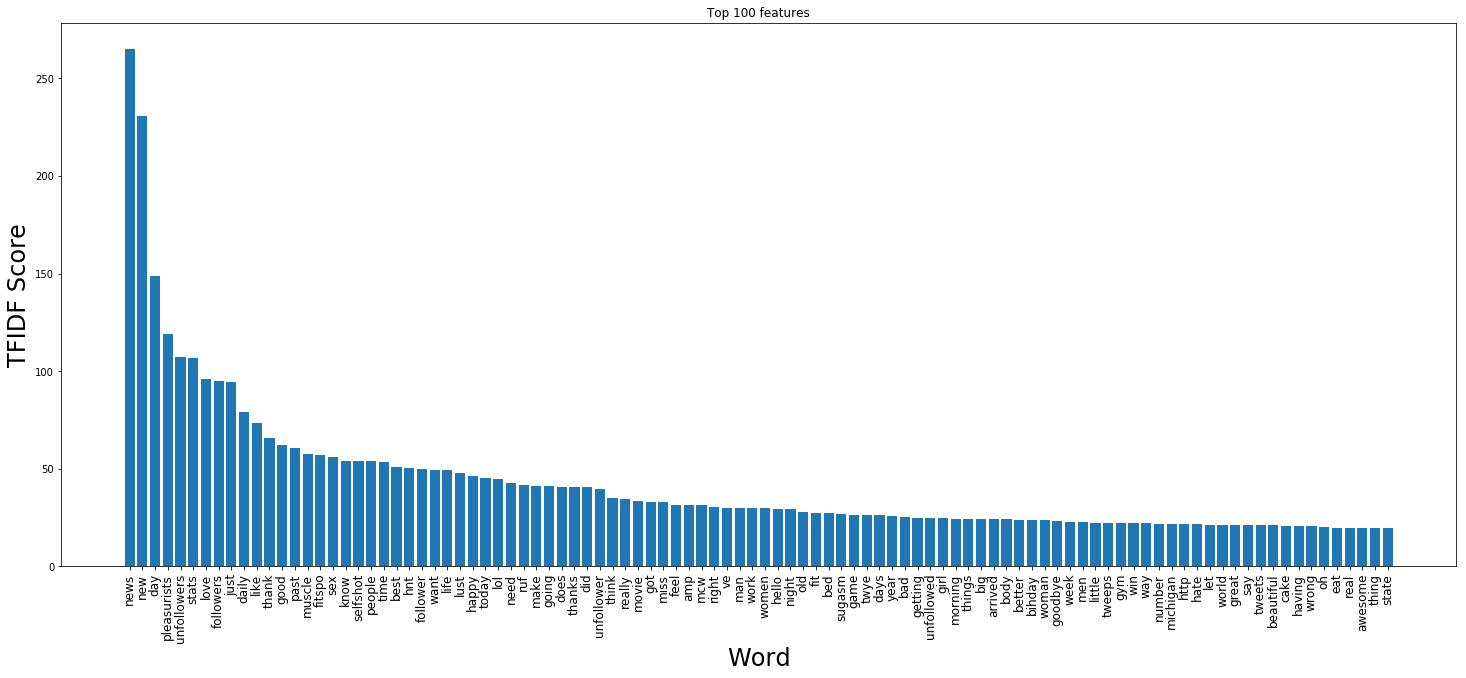

In [133]:
top_n(tfidf_result, feature_names, top=100)

In [134]:
# Topic Modeling
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

num_topics = 10

lda_model = LatentDirichletAllocation(n_topics=num_topics, max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(tfidf_result)
print('LDA shape: ')
print(lda_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)

# Build a Non-Negative Matrix Factorization Model
nmf_model = NMF(n_components=num_topics)
nmf_Z = nmf_model.fit_transform(tfidf_result)
print('NMF shape: ')
print(nmf_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)

# Build a Latent Semantic Indexing Model
lsi_model = TruncatedSVD(n_components=num_topics)
lsi_Z = lsi_model.fit_transform(tfidf_result)
print('LSI shape: ')
print(lsi_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)


/Users/jtsui/.local/share/virtualenvs/detectAna-gf5TNXCz/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LDA shape: 
(9076, 10)
NMF shape: 
(9076, 10)
LSI shape: 
(9076, 10)


In [135]:
def print_topics(model, top_n=10):
        for idx, topic in enumerate(model.components_):
            print("Topic %d:" % (idx))
            print([(vec.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]])

In [136]:
# Let's see how the first document in the corpus looks like in different topic spaces
print("LDA Model:")
print_topics(lda_model)
print("=" * 20)

print("NMF Model:")
print_topics(nmf_model)
print("=" * 20)

print("LSI Model:")
print_topics(lsi_model)
print("=" * 20)

LDA Model:
Topic 0:
[('daily', 94.692454512418436), ('lol', 54.148510509217282), ('want', 28.556013872976013), ('does', 27.221395946209345), ('just', 23.421325075304111), ('news', 22.844057484754352), ('life', 19.271006140398828), ('right', 19.078414886845177), ('tomorrow', 17.254665935521292), ('ll', 15.197074599313984)]
Topic 1:
[('sex', 54.526970444478373), ('bad', 26.931014506398089), ('ruf', 26.149187279551882), ('women', 21.443385174070556), ('cake', 20.716209168668204), ('protein', 20.448258773790194), ('ty', 17.45447611891742), ('man', 15.876665216026387), ('friends', 14.758870679271453), ('recovery', 14.116975784138505)]
Topic 2:
[('pleasurists', 115.16254175343069), ('lust', 45.64606366392146), ('sugasm', 24.117874055856621), ('like', 16.920210127588454), ('vibrator', 15.255860429058066), ('ad', 14.766848250575631), ('finally', 14.515510679755172), ('people', 12.654142216034218), ('menopause', 12.319524146660054), ('rose', 12.041040741512322)]
Topic 3:
[('twye', 34.1398106409

### Add "follows_professional_sg" and "follows_sg" column to analysed_users

In [27]:
analysed_users["follows_sg"] = False
t = list(user_info[user_info["follows_sg"] == True]["screen_name"])
analysed_users.loc[analysed_users["tweeter_screen_name"].isin(t), "follows_sg"] = True

analysed_users["follows_professional_sg"] = False
t = list(user_info[user_info["follows_professional_sg"] == True]["screen_name"])
analysed_users.loc[analysed_users["tweeter_screen_name"].isin(t), "follows_professional_sg"] = True

analysed_users.head()

,created_at,entities,id,in_reply_to_status_id,in_reply_to_user_id,text,truncated,tweeter_id,tweeter_screen_name,processed_text,compound,pos,neg,neu,compound_np,pos_np,neg_np,neu_np,follows_sg,follows_professional_sg
0,2018-10-16 22:35:35,"{'hashtags': [], 'symbols': [], 'user_mentions...",1052327221975748608,NaN,NaN,Whenever I talk negatively about my recovering...,False,41652445,HanBaNannz,whenever i talk negatively about my recovering...,0.7778,0.194,0.087,0.720,0.7778,0.194,0.087,0.720,False,False
1,2018-10-16 01:38:07,"{'hashtags': [], 'symbols': [], 'user_mentions...",1052010768965791744,NaN,NaN,RT @CassTolliver: Coffee https://t.co/3e7SL6oBQ8,False,41652445,HanBaNannz,coffee,0.0000,0.000,0.000,1.000,0.0000,0.000,0.000,1.000,False,False
2,2018-10-15 23:10:30,"{'hashtags': [], 'symbols': [], 'user_mentions...",1051973619193208832,NaN,NaN,RT @Dame_Lillard: Rock bottom will teach you l...,False,41652445,HanBaNannz,lillard rock bottom will teach you lessons th...,0.5106,0.231,0.000,0.769,0.5106,0.216,0.000,0.784,False,False
3,2018-10-15 19:20:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",1051915611675287555,NaN,NaN,RT @PatMcAfeeShow: White folks https://t.co/Bu...,False,41652445,HanBaNannz,white folks,0.0000,0.000,0.000,1.000,0.0000,0.000,0.000,1.000,False,False
4,2018-10-14 19:36:01,"{'hashtags': [{'text': 'LittleSister', 'indice...",1051557254464450562,NaN,NaN,RT @BarstoolMSU: A story in 4 pictures\n\n#Lit...,False,41652445,HanBaNannz,a story in pictures littlesister gogreen,0.0000,0.000,0.000,1.000,0.0000,0.000,0.000,1.000,False,False


In [28]:
yays = analysed_users[(analysed_users['follows_sg'] == True) | (analysed_users['follows_professional_sg'] == True)]  
yays.reset_index(inplace=True)
yays_i = np.random.choice(yays.shape[0],2000)
df1 = yays.loc[yays_i]

nays = analysed_users[(analysed_users.follows_sg == False) & (analysed_users.follows_professional_sg == False)]
nays.reset_index(inplace=True)
nays_i = np.random.choice(nays.shape[0],2000)
df2 = nays.loc[nays_i]


In [29]:
pd.concat([df1,df2]).head()

,index,created_at,entities,id,in_reply_to_status_id,in_reply_to_user_id,text,truncated,tweeter_id,tweeter_screen_name,...,compound,pos,neg,neu,compound_np,pos_np,neg_np,neu_np,follows_sg,follows_professional_sg
1274,7482,2013-09-22 15:14:12,"{'hashtags': [], 'symbols': [], 'user_mentions...",381798590475436032,NaN,NaN,RT @TanBarbie_xo: I need more fall clothes.,False,29069186,xbertyx,...,0.000,0.000,0.0,1.000,0.0000,0.000,0.000,1.000,False,True
2662,8870,2013-04-21 15:05:10,"{'hashtags': [], 'symbols': [], 'user_mentions...",325988587659214848,NaN,NaN,RT @ThatGymGirl_: Anyone on body space on http...,False,29069186,xbertyx,...,0.000,0.000,0.0,1.000,0.0000,0.000,0.000,1.000,False,True
2274,8482,2013-04-27 17:46:19,"{'hashtags': [], 'symbols': [], 'user_mentions...",328203470400274433,NaN,NaN,RT @fitnesismydrug: one follower away! but sor...,False,29069186,xbertyx,...,-0.631,0.000,0.3,0.700,-0.8516,0.000,0.399,0.601,False,True
2825,9033,2013-04-20 17:53:17,"{'hashtags': [], 'symbols': [], 'user_mentions...",325668508354613248,3.256659e+17,1.112639e+09,@321FIT this.,False,29069186,xbertyx,...,0.000,0.000,0.0,1.000,0.0000,0.000,0.000,1.000,False,True
917,7125,2013-12-03 18:39:49,"{'hashtags': [], 'symbols': [], 'user_mentions...",407942265454489600,4.079414e+17,1.628541e+09,@another_fit_gir wow :O,False,29069186,xbertyx,...,0.743,0.863,0.0,0.137,0.3954,0.548,0.308,0.144,False,True


In [30]:
nays.head()

,index,created_at,entities,id,in_reply_to_status_id,in_reply_to_user_id,text,truncated,tweeter_id,tweeter_screen_name,...,compound,pos,neg,neu,compound_np,pos_np,neg_np,neu_np,follows_sg,follows_professional_sg
0,0,2018-10-16 22:35:35,"{'hashtags': [], 'symbols': [], 'user_mentions...",1052327221975748608,NaN,NaN,Whenever I talk negatively about my recovering...,False,41652445,HanBaNannz,...,0.7778,0.194,0.087,0.720,0.7778,0.194,0.087,0.720,False,False
1,1,2018-10-16 01:38:07,"{'hashtags': [], 'symbols': [], 'user_mentions...",1052010768965791744,NaN,NaN,RT @CassTolliver: Coffee https://t.co/3e7SL6oBQ8,False,41652445,HanBaNannz,...,0.0000,0.000,0.000,1.000,0.0000,0.000,0.000,1.000,False,False
2,2,2018-10-15 23:10:30,"{'hashtags': [], 'symbols': [], 'user_mentions...",1051973619193208832,NaN,NaN,RT @Dame_Lillard: Rock bottom will teach you l...,False,41652445,HanBaNannz,...,0.5106,0.231,0.000,0.769,0.5106,0.216,0.000,0.784,False,False
3,3,2018-10-15 19:20:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",1051915611675287555,NaN,NaN,RT @PatMcAfeeShow: White folks https://t.co/Bu...,False,41652445,HanBaNannz,...,0.0000,0.000,0.000,1.000,0.0000,0.000,0.000,1.000,False,False
4,4,2018-10-14 19:36:01,"{'hashtags': [{'text': 'LittleSister', 'indice...",1051557254464450562,NaN,NaN,RT @BarstoolMSU: A story in 4 pictures\n\n#Lit...,False,41652445,HanBaNannz,...,0.0000,0.000,0.000,1.000,0.0000,0.000,0.000,1.000,False,False


In [31]:
analysed_users.shape

(9076, 20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11109fef0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1061b1860>], dtype=object)

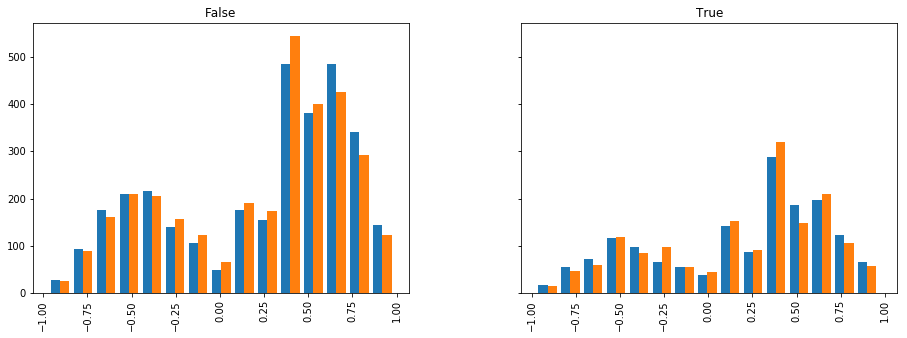

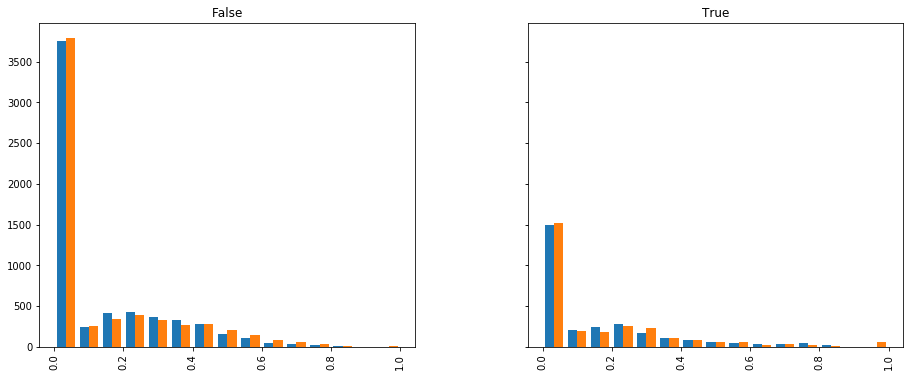

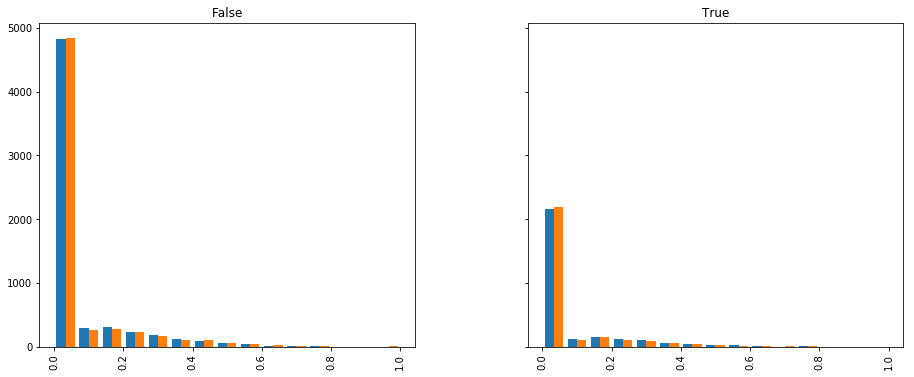

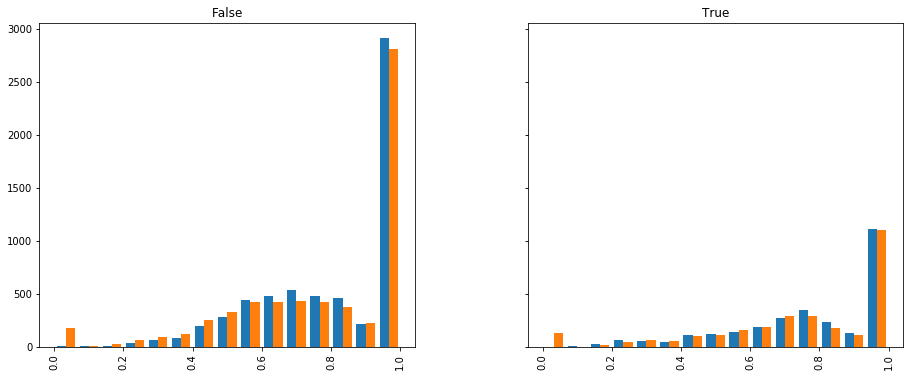

In [32]:
analysed_users['is_support'] = (analysed_users['follows_sg'] == True) | (analysed_users['follows_professional_sg'] == True)
analysed_users.loc[ (analysed_users['compound_np'] !=0) & (analysed_users['compound'] !=0) ][['compound_np','compound']].hist(bins=15, by=analysed_users['is_support'],figsize=(15,5), sharex=True, sharey=True)
analysed_users[['pos_np','pos']].hist(bins=15, by=analysed_users['is_support'], figsize=(15,6), sharex=True, sharey=True)
analysed_users[['neg_np','neg']].hist(bins=15, by=analysed_users['is_support'], figsize=(15,6), sharex=True, sharey=True)
analysed_users[['neu_np','neu']].hist(bins=15, by=analysed_users['is_support'], figsize=(15,6), sharex=True, sharey=True)


In [33]:
np.unique(analysed_users.is_support, return_counts=True)

(array([False,  True], dtype=bool), array([6208, 2868]))

In [34]:
cols = ['compound', 'pos', 'neg', 'neu']
cols_np = ['compound_np', 'pos_np', 'neg_np', 'neu_np']

In [35]:
analysed_users.shape

(9076, 21)

In [36]:
analysed_users[analysed_users['is_support'] == True][cols].describe()

,compound,pos,neg,neu
count,2868.000000,2868.000000,2868.000000,2868.000000
mean,0.112602,0.160084,0.066886,0.752105
std,0.373790,0.229932,0.144711,0.272055
min,-0.968600,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.609000
50%,0.000000,0.000000,0.000000,0.785000
75%,0.421500,0.267000,0.000000,1.000000
max,0.964800,1.000000,1.000000,1.000000


In [37]:
analysed_users[analysed_users['is_support'] == False][cols].describe()


,compound,pos,neg,neu
count,6208.000000,6208.000000,6208.000000,6208.000000
mean,0.112929,0.133533,0.062913,0.779551
std,0.370969,0.199560,0.143469,0.256824
min,-0.970000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.609000
50%,0.000000,0.000000,0.000000,0.851000
75%,0.401900,0.248000,0.000000,1.000000
max,0.985400,1.000000,1.000000,1.000000


In [38]:
analysed_users.loc[(analysed_users['is_support'] == True) & (analysed_users['compound_np'] !=0) & (analysed_users['compound'] !=0) ][['compound_np','compound']].describe()

,compound_np,compound
count,1610.000000,1610.000000
mean,0.187867,0.182160
std,0.487780,0.473034
min,-0.974400,-0.968600
25%,-0.237400,-0.226300
50%,0.381800,0.361200
75%,0.570425,0.542300
max,0.964800,0.964800


In [39]:
analysed_users.loc[(analysed_users['is_support'] == False) & (analysed_users['compound_np'] !=0) & (analysed_users['compound'] !=0) ][['compound_np','compound']].describe()

,compound_np,compound
count,3185.000000,3185.000000
mean,0.228717,0.215182
std,0.508227,0.492388
min,-0.955200,-0.970000
25%,-0.273200,-0.250000
50%,0.419900,0.361200
75%,0.636900,0.599400
max,0.985400,0.985400
